Instructions: each piece of instruction is contained in a cell below. 

**PREFERRED DELIVERY METHOD**
Fork this github repository on your own github, make that repository private and make fedhere a collaborator. Upload your solution to this repository. 

**OTHERWISE**
If you are not familiar with github and you cannot figure out how to follow the instructions above you can email the solution.

Fill in each cell below each piece of instruction. This is not a close-book test: feel free to use any resources (google, stackoverflow, books) that you want! 

If you cannot complete a task feel free to ask for the solution for that portion of the exercise. There are multiple aspects we will evaluate you on and it is expected that you will be  stronger on some tasks than on others. We will use this information to best fit you in our CA assignments. For example, if you cannot read in the data as we are asking, you can as for a clean dataset so that you can show you can do the modeling part. If you are in this situation send us an email. 

Try to write clean, readable code. This will also be a parameter of evaluation.

import relevant packages

In [138]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score

** Data acquisition and cleaning **

In [47]:
datain = pd.read_csv('logreg.csv', 
                     names=['x1', 'x2', 'color', 'y'])

datain['y'] = np.where(datain['color'] == 'green', 0.0, 1.0)

# Currently x2 column is of the data type string so we should transform it.
datain['x2'] = pd.to_numeric(datain['x2'], errors='coerce')

# Now we can drop the NaN row
datain.dropna(inplace=True)

Read in the data file called logreg2. Call the columns x1, x2, color, and y (y should be the numerical conversion of color). Convert each column to a floating point variable mapping the last column to 0s and 1s according to the value. Drop poorly inputed data. At the end of the process the data should look like this:

In [48]:
datain.head()

,x1,x2,color,y
0,1.103418,5.160703,green,0.0
1,0.754804,5.846008,green,0.0
2,-1.651331,7.416112,green,0.0
3,-2.502233,7.799007,green,0.0
4,-0.183246,9.076321,green,0.0


In [49]:
datain.describe()

,x1,x2,y
count,196.000000,196.000000,196.000000
mean,3.221567,4.282077,0.448980
std,3.519541,3.409446,0.498664
min,-4.841950,-3.133742,0.000000
25%,0.617336,1.696219,0.000000
50%,3.071503,4.270623,0.000000
75%,5.738187,7.095339,1.000000
max,13.162562,12.174896,1.000000


** Displaying data **

Plot the data on the x1-x2 plane using the categorical variable as color; make sure that the axes labels are readable and that the axes are on the same scale. 
use the third column as a color category.

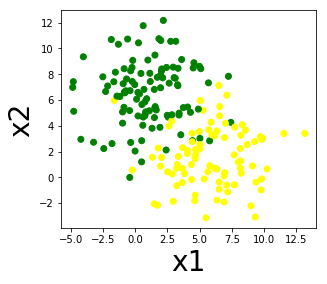

In [72]:
plt.scatter(datain['x1'], 
            datain['x2'],
            c=datain['color'])
plt.xlabel('x1', fontsize=28)
plt.ylabel('x2', fontsize=28)
plt.axis('scaled')
plt.show()

** Modeling **

Now that your data is read in properly,
Initiate a logistic regression object with the x1, x2, and y variables for modeling, setting C = 10,000 to disable regularization

In [74]:
lr = LogisticRegression(C=10000)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(datain[['x1', 'x2']], datain['y'],
                                                    test_size=0.33)

Run logistic regression on the training set

In [78]:
lr.fit(X_train, y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Print out the fitted parameters (including the intercept)

In [85]:
print("Coefficients of the features in the decision function: {}".format(lr.coef_[0]))
print("Intercept (bias) added to the decision function: {}".format(lr.intercept_[0]))

Coefficients of the features in the decision function: [ 0.8093732  -0.78819039]
Intercept (bias) added to the decision function: 0.08797869045164612


Use these parameters to predict on the test set

In [88]:
y_test_pred = lr.predict(X_test)

** Displaying and interpreting the result **

Draw two plots, first one showing your prediction, second one for the actual labels, with decision boundary in both

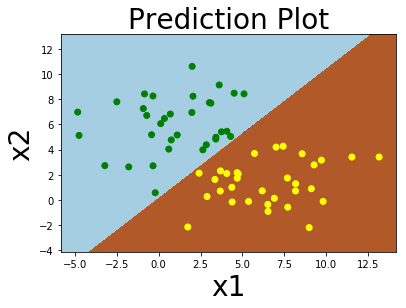

In [114]:
x1_min, x1_max = datain['x1'].min() - 1, datain['x1'].max() + 1
x2_min, x2_max = datain['x2'].min() - 1, datain['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, .02),
                     np.arange(x2_min, x2_max, .02))

Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X_test['x1'],
            X_test['x2'],
            color=np.where(y_test_pred == 1.0, 'yellow', 'green'))
plt.title('Prediction Plot', fontsize=28)
plt.xlabel('x1', fontsize=28)
plt.ylabel('x2', fontsize=28)
plt.show()

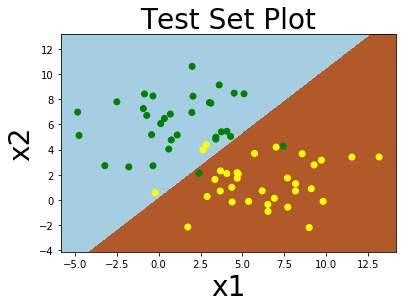

In [115]:
x1_min, x1_max = datain['x1'].min() - 1, datain['x1'].max() + 1
x2_min, x2_max = datain['x2'].min() - 1, datain['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, .02),
                     np.arange(x2_min, x2_max, .02))

Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X_test['x1'],
            X_test['x2'],
            color=np.where(y_test == 1.0, 'yellow', 'green'))
plt.title('Test Set Plot', fontsize=28)
plt.xlabel('x1', fontsize=28)
plt.ylabel('x2', fontsize=28)
plt.show()

Calculate and display visually the confusion matrix to evaluate the model's performance, print out accuracy, recall and precision. Comment on your result

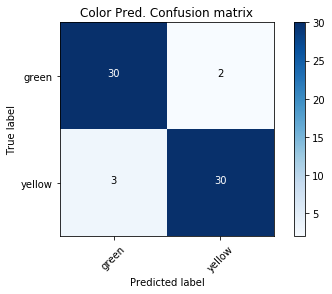

Predicted with 92.31% mean accuracy
Precision: 93.75%
Recall: 90.9090909090909%


In [136]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cfm = confusion_matrix(y_test, y_test_pred)

plt.figure()
plot_confusion_matrix(cfm, 
                      classes=['green', 'yellow'],
                      title='Color Pred. Confusion matrix')
plt.show()

print("Predicted with {0:.2f}% mean accuracy".format(lr.score(X_test, y_test)*100))

precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision * 100}%")

recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall * 100}%")

In [147]:
# The model does a decent job of predicting the colors.
# The precision score shows that when we predict green, we are right 93.75% of the time
# The recall score show that when we predict green 90.91% of the time

Run a linear regression on the data and comment on which model is "best" and why.

In [126]:
# Without having yet running a linear regression on the data, we can already tell that
# we will not get optimal results being that what we are trying to predict is a binary outcome.

In [139]:
linreg = LinearRegression()

In [140]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
y_test_pred_linreg = linreg.predict(X_test)

In [142]:
y_test_pred_linreg

array([ 0.64095918,  0.26279806,  1.03333184,  0.12212216,  0.47734404,
        0.89595258,  0.25011185,  0.25185485, -0.0520028 ,  0.14336961,
       -0.17395337,  0.72627717,  0.83121621,  0.66617667,  1.28371896,
        0.89567805,  0.31391377,  0.29009101,  0.61840478, -0.10203927,
        0.72449808,  0.69639831,  1.19742933,  0.1911533 ,  1.0286336 ,
        0.15776663,  1.08593421, -0.28069671,  0.78119534,  0.41532107,
       -0.15152414,  0.10947746,  0.75224035,  0.42128993,  0.21109918,
        0.30709608,  0.93157869,  0.7456181 ,  0.70716946, -0.05623219,
        0.43493234,  0.6990275 ,  0.43066018,  0.11469919,  0.99561145,
        0.72103616,  0.6579292 , -0.02940057,  1.20243678,  1.08744479,
        0.10989793,  0.2199995 ,  0.54238547,  0.86363805,  0.97682006,
        0.43428137,  0.42179462,  0.46566411,  0.98524408,  0.11081145,
        0.02129726,  0.21995871,  0.99096973,  0.97171754,  1.08671642])

In [143]:
# Notice that we don't get actionable predictions with the results of linear regression
# These numbers aren't all exactly on a probability space so we can't massage the data that way

In [144]:
# Logistic regression best fits the problem we were trying to tackle with this assessment
# because the action variable y is binary. This means that we want to classify
# whether the point should be one or the other. We are not looking for a numeric output.